## Basic implementation of Neural Network using numpy


In [1]:
# Use the following command to install required packages

# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Layer:
    __slots__ = ['weights', 'biases', 'activation', 'biases_gradient', 'weights_gradient']

    def __init__(self, nodes_in, nodes_out, activation='sigmoid'):
        self.weights = np.random.normal(size=(nodes_in, nodes_out))
        self.biases = np.random.normal(size=(1, nodes_out))
        self.biases_gradient = np.zeros(self.biases.shape)
        self.weights_gradient = np.zeros(self.weights.shape)
        if activation == 'sigmoid':
            self.activation = self.sigmoid
        elif activation == 'linear':
            self.activation = self.linear

    def calculate_layer(self, input):
        """
        Calculate the output of the layer
        Takes in a numpy array and returns a numpy array
        """
        return self.activation(np.dot(input, self.weights) + self.biases)

    def sigmoid(self, x):
        """
        Sigmoid activation function
        Takes in a numpy array and returns a numpy array
        """
        return 1/(1+np.exp(-x))

    def linear(self, x):
        """
        Linear activation function
        Takes in a numpy array and returns a numpy array
        """
        return x

    def report_layer(self, layer_num):
        return f'Layer number {layer_num}\nWeights\n{self.weights}\nbiases\n{self.biases}'

    def apply_gradient(self, learning_rate):
        self.weights -= learning_rate * self.weights_gradient
        self.biases -= learning_rate * self.biases_gradient

In [96]:
class NeuralNetwork:
    __slots__ = ['hidden_layers', 'layers']

    def __init__(self, hidden_layers, input_size, output_size):
        self.hidden_layers = hidden_layers
        self.layers = []

        # Create the input layer
        input_layer = Layer(1, hidden_layers[0])
        self.layers.append(input_layer)

        # Create the hidden layers
        for input_size, output_size in zip(hidden_layers, hidden_layers[1:]):
            self.layers.append(Layer(input_size, output_size))

        # Create the output layer
        output_layer = Layer(hidden_layers[-1], 1, activation='linear')
        self.layers.append(output_layer)

    def forward(self, input):
        """
        Takes a input and returns the output of the network
        """
        for layer in self.layers:
            input = layer.calculate_layer(input)
        return input

    def train(self, input, output, learning_rate=0.001):
        """
        Train the network on a given dataset
        """
        for i in range(20000):
            input_aaa = input.to_frame().join(output)
            input_i = input_aaa.sample(frac=0.1)
            self.calculate_gradient(input_i["x"], input_i["y"])
            self.apply_gradient(learning_rate)
            if i % 500 == 0:
                print(f'Epoch {i} MSE: {self.mean_squared_error(input, output)}')

    def backpropagation(self, input, output, learning_rate=0.001):
        """
        Perform backpropagation on the network
        """
        pass

    def mean_squared_error(self, input, output):
        """
        Calculate the mean squared error of the network on a given dataset and output
        """
        mse = []
        for i,j in zip(input, output):
            mse.append((j - self.forward(i)) ** 2)
        return np.mean(mse)

    def visualize(self):
        """
        Visualize the network architecture
        """
        for i, layer in enumerate(self.layers):
            print(layer.report_layer(i))
            print("\n")

    def apply_gradient(self, learning_rate):
        for layer in self.layers:
            layer.apply_gradient(learning_rate)

    def calculate_gradient(self, input, output):
        """
        Calculate the gradient of the network
        """
        h = 0.00001
        original_mse = self.mean_squared_error(input, output)

        for layer in self.layers:
            for i in range(layer.weights.shape[0]):
                for j in range(layer.weights.shape[1]):
                    layer.weights[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.weights_gradient[i, j] = (new_mse - original_mse) / h
                    layer.weights[i, j] -= h

            for i in range(layer.biases.shape[0]):
                for j in range(layer.biases.shape[1]):
                    layer.biases[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.biases_gradient[i, j] = (new_mse - original_mse) / h
                    layer.biases[i, j] -= h

# First set

In [82]:
square_simple = pd.read_csv('../data/regression/square-simple-test.csv', index_col=0)

,x,y
1,-0.980437,-43.486918
2,-1.219074,3.752808
3,0.124243,-128.610721
4,1.227789,5.671828
5,1.067348,-27.469169
...,...,...
96,1.315377,25.719403
97,-1.196968,-1.054107
98,1.544766,84.767303
99,0.441051,-112.492699


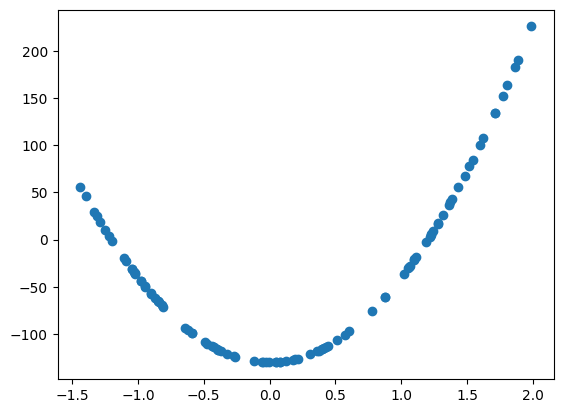

In [85]:
# scater plot of the data
plt.scatter(square_simple['x'], square_simple['y'])
square_simple

In [97]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])
neural1.train(square_simple["x"], square_simple["y"])
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 8798.146125095993
Epoch 500 MSE: 4331.714341426353
Epoch 1000 MSE: 3409.4556872180387
Epoch 1500 MSE: 2909.7725287299686
Epoch 2000 MSE: 2597.544274084175
Epoch 2500 MSE: 2401.2957971880246
Epoch 3000 MSE: 2260.134382800026
Epoch 3500 MSE: 2150.379752703892
Epoch 4000 MSE: 2070.8726255738206
Epoch 4500 MSE: 2011.2278758989594
Epoch 5000 MSE: 1972.4140942516533
Epoch 5500 MSE: 1939.1635615616613
Epoch 6000 MSE: 1906.6602459111812
Epoch 6500 MSE: 1883.6743591062268
Epoch 7000 MSE: 1862.6621499086714
Epoch 7500 MSE: 1850.4874178404164
Epoch 8000 MSE: 1832.479873483379
Epoch 8500 MSE: 1821.2164582169235
Epoch 9000 MSE: 1808.866739719504
Epoch 9500 MSE: 1799.545139241876
Epoch 10000 MSE: 1791.3873062787584
Epoch 10500 MSE: 1786.371225402056
Epoch 11000 MSE: 1780.444121934692
Epoch 11500 MSE: 1776.0881581115777
Epoch 12000 MSE: 1772.2590621171
Epoch 12500 MSE: 1768.0350184481085
Epoch 13000 MSE: 1766.0947763737925
Epoch 13500 MSE: 1762.9095399756907
Epoch 14000 MSE: 1758.9199235

1741.5382889036073

Layer number 0
Weights
[[ -10.7413685   -66.42434173 -103.16908823 -167.68976     -51.10989349]]
biases
[[-23.78572963  29.09319582 -73.28038757 119.60837951 -84.61360998]]


Layer number 1
Weights
[[  33.20843504]
 [ -18.86557951]
 [  99.3972304 ]
 [-137.97590418]
 [  66.15821842]]
biases
[[31.69493433]]


None


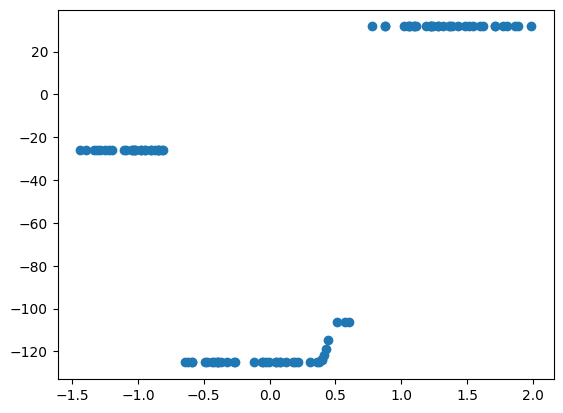

In [41]:
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y)
print(neural1.visualize())

2.3145685608885307

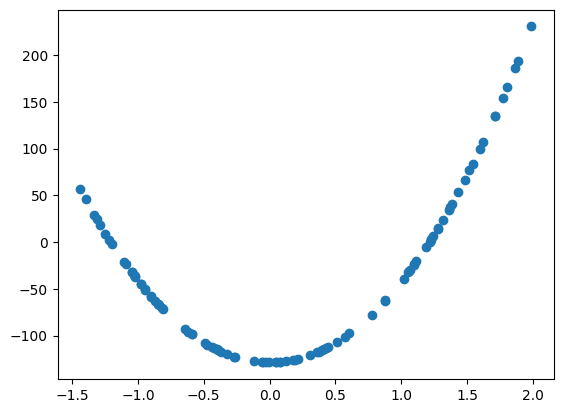

In [36]:
neural1.layers[0].biases =  np.array([[-2.9,-2.8897,-2.8897,-2.8897,-2.8897]])
neural1.layers[0].weights = np.array([[-0.9733, -0.9733, -0.9733, -0.9733, 0.9733]])
neural1.layers[1].weights = np.array([[502], [502], [502], [502], [1993]])
neural1.layers[1].biases = np.array([[-339.16]])
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

In [55]:
neural2 = NeuralNetwork([10], 1, 1)
neural2.mean_squared_error(square_simple['x'], square_simple['y'])
neural2.train(square_simple["x"], square_simple["y"])
neural2.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 6.502058729465968
Epoch 50 MSE: 0.8407360725144178
Epoch 100 MSE: 0.8149753885370471
Epoch 150 MSE: 0.7956386849167552
Epoch 200 MSE: 0.7779210021917748
Epoch 250 MSE: 0.7682460018445562
Epoch 300 MSE: 0.761009010583968
Epoch 350 MSE: 0.7519225106682201
Epoch 400 MSE: 0.7401990217330224
Epoch 450 MSE: 0.7284370530266243
Epoch 500 MSE: 0.7228695661178215
Epoch 550 MSE: 0.7062874486495591
Epoch 600 MSE: 0.6959597757245417
Epoch 650 MSE: 0.6827487747149782
Epoch 700 MSE: 0.6707713352069372
Epoch 750 MSE: 0.6586187989413689
Epoch 800 MSE: 0.6454510280567629
Epoch 850 MSE: 0.6382477580730016
Epoch 900 MSE: 0.6203099900835233
Epoch 950 MSE: 0.6051099132943972
Epoch 1000 MSE: 0.5909101580716828
Epoch 1050 MSE: 0.5789983437066497
Epoch 1100 MSE: 0.5598572819524995
Epoch 1150 MSE: 0.5439411577655392
Epoch 1200 MSE: 0.5290979653032002
Epoch 1250 MSE: 0.5122690024181423
Epoch 1300 MSE: 0.49442302788714493
Epoch 1350 MSE: 0.4767904709387525
Epoch 1400 MSE: 0.4589342988070164
Epoch 145

0.25808669493529857

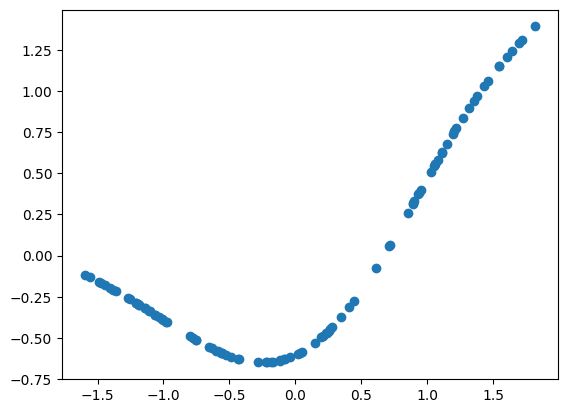

In [56]:
y = []
for i in square_simple["x"]:
    y.append(neural2.forward(i))
plt.scatter(square_simple["x"], y)

In [10]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.mean_squared_error(square_simple['x'], square_simple['y'])
# neural3.train(square_simple["x"], square_simple["y"])
# neural3.mean_squared_error(square_simple["x"], square_simple["y"])

8611.457345009921

# Second set

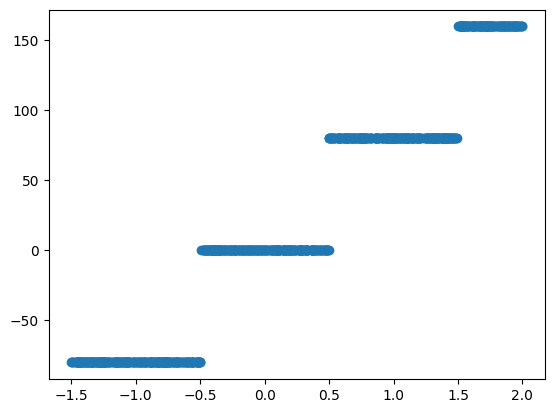

In [62]:
steps_large = pd.read_csv("../data/regression/steps-large-test.csv", index_col=0)
plt.scatter(steps_large["x"], steps_large["y"])

In [93]:
neural4 = NeuralNetwork([5], 1, 1)
neural4.mean_squared_error(steps_large["x"], steps_large["y"])
neural4.train(steps_large["x"], steps_large["y"])
neural4.mean_squared_error(steps_large["x"], steps_large["y"])

Epoch 0 MSE: 7460.138203946953
Epoch 500 MSE: 2146.458312688779
Epoch 1000 MSE: 1295.623643980372
Epoch 1500 MSE: 829.7004897713153
Epoch 2000 MSE: 567.8571915571408
Epoch 2500 MSE: 432.67498377546855
Epoch 3000 MSE: 341.0006127299123
Epoch 3500 MSE: 293.17772898829446
Epoch 4000 MSE: 249.30424160788994
Epoch 4500 MSE: 224.68220219344275
Epoch 5000 MSE: 196.0592219545437
Epoch 5500 MSE: 188.17459532366556
Epoch 6000 MSE: 170.4843520944789
Epoch 6500 MSE: 171.42597482443892
Epoch 7000 MSE: 154.50961056189703
Epoch 7500 MSE: 147.86002038122194
Epoch 8000 MSE: 138.7653273118497
Epoch 8500 MSE: 151.4631442712921
Epoch 9000 MSE: 141.8645909751123
Epoch 9500 MSE: 126.31631908141802
Epoch 10000 MSE: 133.42909208597473
Epoch 10500 MSE: 119.51236825579718
Epoch 11000 MSE: 119.20121587856865
Epoch 11500 MSE: 124.2581202206469
Epoch 12000 MSE: 111.1981673487752
Epoch 12500 MSE: 111.25104287940907
Epoch 13000 MSE: 103.35521135581259
Epoch 13500 MSE: 101.29867787324702
Epoch 14000 MSE: 102.62639556

85.81658969496394

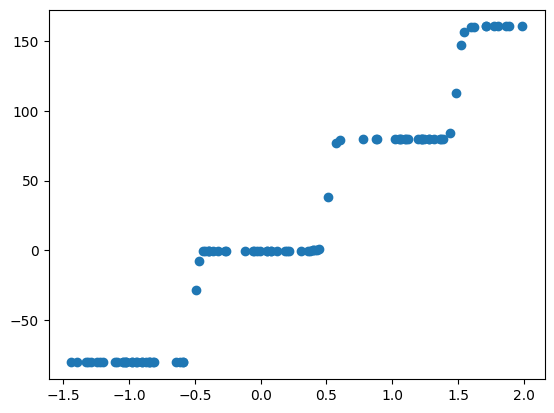

In [90]:
y = []
for i in square_simple["x"]:
    y.append(neural4.forward(i))
plt.scatter(square_simple["x"], y)

In [ ]:
neural5 = NeuralNetwork([10], 1, 1)
neural5.mean_squared_error(steps_large["x"], steps_large["y"])
neural5.train(steps_large["x"], steps_large["y"])
neural5.mean_squared_error(steps_large["x"], steps_large["y"])

Epoch 0 MSE: 6849.19303561521
Epoch 50 MSE: 1132.4025182409039
Epoch 100 MSE: 679.7175194688705
Epoch 150 MSE: 492.8225784955538
Epoch 200 MSE: 395.1392771973632
Epoch 250 MSE: 326.7133815374047
Epoch 300 MSE: 318.59284275138833
Epoch 350 MSE: 264.94177750970863
Epoch 400 MSE: 243.67805880682818
Epoch 450 MSE: 254.62058049358015
Epoch 500 MSE: 211.38642330571523
Epoch 550 MSE: 209.16443689923236
Epoch 600 MSE: 181.79606066782387
Epoch 650 MSE: 176.30983512845066
Epoch 700 MSE: 178.4524826210602
Epoch 750 MSE: 157.70034177141468
Epoch 800 MSE: 155.53404808730755
Epoch 850 MSE: 146.61186026284395
Epoch 900 MSE: 145.9658638595774
Epoch 950 MSE: 163.59786971313505
Epoch 1000 MSE: 143.54968633971933
Epoch 1050 MSE: 133.0754538286664
Epoch 1100 MSE: 131.10132781503535
Epoch 1150 MSE: 124.809227773496
Epoch 1200 MSE: 126.41742395303014
Epoch 1250 MSE: 122.19104124683692
Epoch 1300 MSE: 124.58981087884553
Epoch 1350 MSE: 123.18038968015497
Epoch 1400 MSE: 122.28295171122511
Epoch 1450 MSE: 116

101.35710077957332

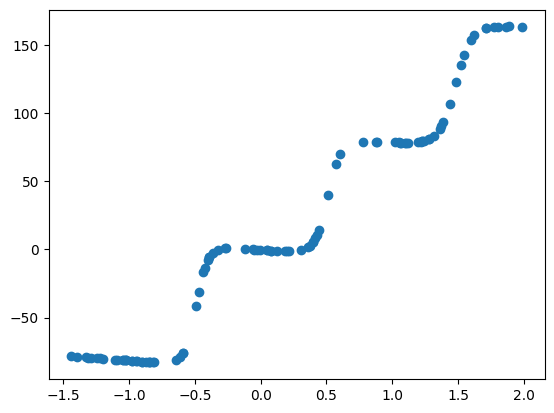

In [50]:
y = []
for i in square_simple["x"]:
    y.append(neural5.forward(i))
plt.scatter(square_simple["x"], y)

In [15]:
neural6 = NeuralNetwork([5,5], 1, 1)
neural6.mean_squared_error(steps_large["x"], steps_large["y"])

7498.433623507755